# Práctica 4 - Multiperceptrón con Tensorflow/Keras

##Objetivos
El objetivo de esta práctica es comprender el funcionamiento del multiperceptrón.

##Temas

* Métricas: precision, recall, F1-Score
* Multiperceptrón

##Lectura
Material de Lectura: Capítulos 2 y 3 del libro Neural Networks and Deep Learning.

# Imports


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

FUENTES_DIR = '/content/drive/MyDrive/DeepLearning-colab/Fuentes-20240901'
DATOS_DIR = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901'

import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing, model_selection, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import optimizers

In [3]:
binarizer = preprocessing.LabelBinarizer()
scaler = preprocessing.StandardScaler()

##Cálculos manuales

In [ ]:
def calcular_efectividad(y_pred, y_it):
  return 100*(y_pred == y_it).sum()/len(y_it)

def calcular_metricas(cm):
  long_mat = cm.shape[0]

  precision = np.zeros(long_mat)
  recall = np.zeros(long_mat)
  for i in range(long_mat):
    precision[i] = cm[i][i] / sum(cm.T[i])
    recall[i] = cm[i][i] / sum(cm[i])

  f1_score = (2*precision*recall)/(precision + recall)

  accuracy = 0
  for i in range(len(cm)):
    accuracy += cm[i][i]
  accuracy /= cm.sum()

  return (precision, recall, f1_score, accuracy)

def imprimir_metricas(metricas):
  precision, recall, f1_score, accuracy = metricas
  print('precision recall f1-score')
  for i in range(len(precision)):
    print(f'{precision[i]:8.2f} {recall[i]:6.2f} {f1_score[i]:7.2f}')
  print(f'Accuracy: {accuracy}')

# Ejercicio 7

Re-implemente el modelo del ejercicio 4 (Balance.csv) utilizando un Multiperceptrón Tensorflow/Keras.

In [ ]:
balance = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Balance.csv')

In [ ]:
balance.columns

Index(['Balance', 'LeftWeight', 'LeftDist', 'RightWeight', 'RightDist'], dtype='object')

In [ ]:
# Separar atributos y etiquetas
target = 'Balance'
X = balance.drop(columns=target)
y = balance[target]

# Binarizar
y = binarizer.fit_transform(y)

X_train,X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

# Normalizar
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Hiper
entradas = X_train.shape[1]
ocultas = 8
salidas = y_train.shape[1]
activacion = 'tanh'
optimizador = 'sgd'
alfa = 0.01
epocas = 800
tam_lote = 16

# modelo
modelo_7 = Sequential()
modelo_7.add(Dense(ocultas, activation=activacion, input_dim=entradas))
modelo_7.add(Dense(salidas, activation='softmax'))

modelo_7.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = optimizers.SGD(learning_rate=alfa)

modelo_7.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

history = modelo_7.fit(X_train, y_train, batch_size=tam_lote, epochs=epocas)

Epoch 1/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4031 - loss: 1.2705   
Epoch 2/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5435 - loss: 1.0026
Epoch 3/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 0.9182 
Epoch 4/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7009 - loss: 0.7587 
Epoch 5/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7530 - loss: 0.6801 
Epoch 6/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8119 - loss: 0.6096 
Epoch 7/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.5399 
Epoch 8/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.5359 
Epoch 9/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8795 - loss: 0.5139 
Epoch 10/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.4797  
Epoch 11/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9001 - loss: 0.4352 
Epoch 12/800
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

## Performance Entrenamiento

In [ ]:
# Performance entrenamiento
y_pred_train = modelo_7.predict(X_train)

# desb
y_it = binarizer.inverse_transform(y_train)
y_pred_it = binarizer.inverse_transform(y_pred_train)

print(f'Efectividad entrenamiento: {calcular_efectividad(y_pred_it, y_it)}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Efectividad entrenamiento: 97.0


In [ ]:
report = metrics.classification_report(y_it, y_pred_it)
conf_mat = metrics.confusion_matrix(y_it, y_pred_it)

mt = calcular_metricas(conf_mat)

print(f'Reporte de sklearn: \n{report}')
print('*'*50)
print(f'Confusion Matrix: \n{conf_mat}')

Reporte de sklearn: 
              precision    recall  f1-score   support

           B       0.91      0.78      0.84        37
           L       0.98      0.98      0.98       234
           R       0.97      0.99      0.98       229

    accuracy                           0.97       500
   macro avg       0.95      0.92      0.93       500
weighted avg       0.97      0.97      0.97       500

**************************************************
Confusion Matrix: 
[[ 29   2   6]
 [  3 229   2]
 [  0   2 227]]


In [ ]:
print(imprimir_metricas(mt))

precision recall f1-score
    0.91   0.78    0.84
    0.98   0.98    0.98
    0.97   0.99    0.98
Accuracy: 0.97
None


## Performance Test

In [ ]:
# Performance entrenamiento
y_pred_test = modelo_7.predict(X_test)

# desb
y_it = binarizer.inverse_transform(y_test)
y_pred_it = binarizer.inverse_transform(y_pred_test)

print(f'Efectividad entrenamiento: {calcular_efectividad(y_pred_it, y_it)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Efectividad entrenamiento: 92.0


In [ ]:
report = metrics.classification_report(y_it, y_pred_it)
conf_mat = metrics.confusion_matrix(y_it, y_pred_it)

mt = calcular_metricas(conf_mat)

print(f'Reporte de sklearn: \n{report}')
print('*'*50)
print(f'Confusion Matrix: \n{conf_mat}')

Reporte de sklearn: 
              precision    recall  f1-score   support

           B       1.00      0.42      0.59        12
           L       0.98      0.96      0.97        54
           R       0.87      0.98      0.92        59

    accuracy                           0.92       125
   macro avg       0.95      0.79      0.83       125
weighted avg       0.93      0.92      0.91       125

**************************************************
Confusion Matrix: 
[[ 5  0  7]
 [ 0 52  2]
 [ 0  1 58]]


In [ ]:
print(imprimir_metricas(mt))

precision recall f1-score
    1.00   0.42    0.59
    0.98   0.96    0.97
    0.87   0.98    0.92
Accuracy: 0.92
None


# Ejercicio 8

Utilizando el archivo Iris.csv que contiene información referida a la longitud y al ancho de sépalos y pétalos de tres especies de flores: iris setosa, iris versicolor e iris virginica.
<ol type='a'>
<li>Entrenar una multiperceptrón que aprenda a clasificar las 3 clases de flores.</li>
<li>Utilice Python para calcular la matriz de confusión y calcule de forma manual las métricas de precision, recall, accuracy y f1-score. Luego utilice la función classification_report de SciKit-Learn para comparar los resultados.</li>
</ol>


In [ ]:
iris= pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/Iris.csv')

In [ ]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [ ]:
iris.isnull().sum()

,0
sepallength,0
sepalwidth,0
petallength,0
petalwidth,0
class,0


In [ ]:
# Etiquetas y atributos
target = 'class'
X = iris.drop(columns=target)
y = iris[target]

# binarizar etiquetas
y = binarizer.fit_transform(y)

# train/test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

In [ ]:
entradas = X_train.shape[1]
salidas = y_train.shape[1]
ocultas = 7
activacion = 'tanh'
optimizador= 'sgd'
epocas= 600
lote= 16
alfa= 0.01

modelo_8 = Sequential()
modelo_8.add(Dense(ocultas, activation=activacion, input_dim=entradas))
modelo_8.add(Dense(salidas, activation='softmax'))

modelo_8.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59 (236.00 B)

 Trainable params: 59 (236.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizador = optimizers.SGD(learning_rate=alfa)

modelo_8.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])

history = modelo_8.fit(x=X_train, y= y_train, batch_size=lote, epochs=epocas)

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3508 - loss: 1.2574  
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3293 - loss: 1.2103 
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3339 - loss: 1.1166 
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3623 - loss: 1.0509 
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4255 - loss: 1.0132 
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5375 - loss: 0.9711 
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6443 - loss: 0.9245 
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.9008 
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6507 - loss: 0.8820 
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6339 - loss: 0.8698 
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7607 - loss: 0.8509 
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9184 - lo

## Performance Entranamiento

In [ ]:
y_pred = modelo_8.predict(X_train)

y_it = binarizer.inverse_transform(y_train)
y_pred_it = binarizer.inverse_transform(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
report = metrics.classification_report(y_it, y_pred_it)
conf_matrix = metrics.confusion_matrix(y_it, y_pred_it)

print(f'Efectividad: {calcular_efectividad(y_pred_it, y_it)}')
print(f'Reporte de sklearn: \n{report}')
print(f'Matriz de confusión:\n{conf_matrix}')

Efectividad: 97.5
Reporte de sklearn: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.95      0.96        41
 Iris-virginica       0.95      0.98      0.96        42

       accuracy                           0.97       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.97      0.97       120

Matriz de confusión:
[[37  0  0]
 [ 0 39  2]
 [ 0  1 41]]


In [ ]:
metricas= calcular_metricas(conf_matrix)
imprimir_metricas(metricas)

precision recall f1-score
    1.00   1.00    1.00
    0.97   0.95    0.96
    0.95   0.98    0.96
Accuracy: 0.975


##Permormance Testeo

In [ ]:
y_pred = modelo_8.predict(X_test)

y_it = binarizer.inverse_transform(y_test)
y_pred_it = binarizer.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
report = metrics.classification_report(y_it, y_pred_it)
conf_matrix = metrics.confusion_matrix(y_it, y_pred_it)

print(f'Efectividad: {calcular_efectividad(y_pred_it, y_it)}')
print(f'Reporte de sklearn: \n{report}')
print(f'Matriz de confusión:\n{conf_matrix}')

Efectividad: 100.0
Reporte de sklearn: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Matriz de confusión:
[[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]


In [ ]:
metricas= calcular_metricas(conf_matrix)
imprimir_metricas(metricas)

precision recall f1-score
    1.00   1.00    1.00
    1.00   1.00    1.00
    1.00   1.00    1.00
Accuracy: 1.0



# Ejercicio 9

Utilizando los ejemplos del archivo AUTOS.csv genere un modelo utilizando un multiperceptrón para predecir el precio del auto (atributo price) y la cantidad de millas por galón en ruta (MPG-highway) en función del resto de los atributos. Recuerde completar los valores faltantes, utilizar normalización y dividir el dataset en entrenamiento y validación (80/20).

Realice 20 ejecuciones independientes de cada configuración seleccionada calculando las épocas promedio y al error cuadrático medio (ECM). Analice los resultados y respalde las afirmaciones referidas a los resultados obtenidos.

Utilice un máximo de 1000 épocas con lotes de 50 e implemente una parada
temprana con paciencia de 15.
Complete la siguiente tabla y realice un análisis de los valores obtenidos

Donde:

* **Épocas Promedio** es el número de épocas promedio en el que se detuvo el entrenamiento.
* **ECM Promedio** es el promedio del error de predicción en cada entrenamiento.

<table>
<tr>
  <th>Optimizador</th>
  <th>Función activación</th>
  <th>Épocas promedio</th>
  <th>ECM Promedio</th>
</tr>
<!-- fila sgd -->
<tr>
  <th>SGD</th>
  <th>
  <table>
    <tr>
    <th>tanh</th>
    </tr>
    <tr>
    <th>sigmoid</th>
    </tr>
    <tr>
    <th>ReLu</th>
    </tr>
    <tr>
    <th>LeakyReLu</th>
    </tr>
    </table>
  </th>
  <!-- sgd columna 1 -->
  <th>
  <table>
    <tr>
    <th>20.8</th>
    </tr>
    <tr>
    <th>179.2</th>
    </tr>
    <tr>
    <th>20.5</th>
    </tr>
    <tr>
    <th>90.2</th>
    </tr>
    </table>
  </th>
  <!-- sgd columna 2 -->
  <th>
  <table>
    <tr>
    <th>0.3563</th>
    </tr>
    <tr>
    <th>0.3286</th>
    </tr>
    <tr>
    <th>0.3207</th>
    </tr>
    <tr>
    <th>0.1475</th>
    </tr>
  </table>
  </th>
</tr>
<!--fila RMSProp -->
<tr>
  <th>RMSProp</th>
  <th>
  <table>
    <tr>
    <th>tanh</th>
    </tr>
    <tr>
    <th>sigmoid</th>
    </tr>
    <tr>
    <th>ReLu</th>
    </tr>
    <tr>
    <th>LeakyReLu</th>
    </tr>
    </table>
  </th>
  <!-- RMSProp columna1 -->
  <th>
  <table>
    <tr>
    <th>79.9</th>
    </tr>
    <tr>
    <th>136.6</th>
    </tr>
    <tr>
    <th>75.9</th>
    </tr>
    <tr>
    <th>62.7</th>
    </tr>
    </table>
  </th>
  <!--RMSProp columna 2 -->
  <th>
  <table>
    <tr>
    <th>0.1537</th>
    </tr>
    <tr>
    <th>0.2048</th>
    </tr>
    <tr>
    <th>0.1349</th>
    </tr>
    <tr>
    <th>0.1239</th>
    </tr>
  </table>
  </th>
</tr>
<!-- Fila Adam -->
<tr>
  <th>Adam</th>
  <th>
  <table>
    <tr>
    <th>tanh</th>
    </tr>
    <tr>
    <th>sigmoid</th>
    </tr>
    <tr>
    <th>ReLu</th>
    </tr>
    <tr>
    <th>LeakyReLu</th>
    </tr>
    </table>
  </th>
  <!-- Adam columna 1 -->
  <th>
  <table>
    <tr>
    <th>83.3</th>
    </tr>
    <tr>
    <th>93.1</th>
    </tr>
    <tr>
    <th>60.4</th>
    </tr>
    <tr>
    <th>91.1</th>
    </tr>
    </table>
  </th>
  <!-- Adam columa 2 -->
  <th>
  <table>
    <tr>
    <th>0.1425</th>
    </tr>
    <tr>
    <th>0.1729</th>
    </tr>
    <tr>
    <th>0.2091</th>
    </tr>
    <tr>
    <th>0.1357</th>
    </tr>
  </table>
  </th>
</tr>
</table>

In [ ]:
autos_df = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/AUTOS.csv')

In [ ]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       203 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [ ]:
autos_df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [ ]:
autos = autos_df.select_dtypes(include=np.number)

In [ ]:
autos.isnull().sum()

,0
normalized-losses,41
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,4
stroke,4
compression-ratio,0


In [ ]:
values = {
    'price': float(int(autos['price'].mean())),
    'normalized-losses': autos['normalized-losses'].mean(),
    'bore': autos['bore'].mean(),
    'stroke': autos['stroke'].mean(),
    'horsepower': autos['horsepower'].mean(),
    'peak-rpm': autos['peak-rpm'].mean()
}

autos = autos.fillna(value=values)

In [ ]:
autos.isnull().sum()

,0
normalized-losses,0
wheel-base,0
length,0
width,0
height,0
curb-weight,0
engine-size,0
bore,0
stroke,0
compression-ratio,0


In [ ]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  205 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               205 non-null    float64
 8   stroke             205 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         205 non-null    float64
 11  peak-rpm           205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    float64
 15  symboling          205 non-null    int64  
dtypes: float64(11), int64(5)
m

In [ ]:
# separar
targets = ['price', 'highway-mpg']
X = autos.drop(columns=targets)
y = autos[targets]

X = np.array(X)
y = np.array(y)

# normalizar
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# train_test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, shuffle=True)

In [ ]:
# Hiper
epocas = 1000
tam_lote=50
paciencia=15

entradas=X.shape[1]
salidas=len(targets)

activacion='relu'
# activacion='leaky_relu'
# activacion='sigmoid'
# activacion='tanh'

# optimizador='sgd'
# optimizador='rmsprop'
optimizador='Adam'

# modelo
modelo_9 = Sequential()
modelo_9.add(Dense(6,activation=activacion, input_shape=[entradas]))
modelo_9.add(Dense(3, activation=activacion))
modelo_9.add(Dense(salidas))

modelo_9.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 6)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119 (476.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compilar
modelo_9.compile(optimizer=optimizador,loss='mae',metrics=['accuracy', 'mae', 'mse'])

# parada temprana
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=paciencia)

epochs = 0
mse = 0
for i in range(10):
 history = modelo_9.fit(x=X_train, y=y_train, batch_size=tam_lote, epochs=epocas, validation_data=[X_test, y_test], callbacks=[early_stop])
 epochs += len(history.epoch)
 mse += sum(history.history['mse']) / len(history.history['mse'])

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.4949 - loss: 0.9806 - mae: 0.9806 - mse: 1.6007 - val_accuracy: 0.4878 - val_loss: 0.9399 - val_mae: 0.9399 - val_mse: 1.6657
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4896 - loss: 0.9407 - mae: 0.9407 - mse: 1.4486 - val_accuracy: 0.4878 - val_loss: 0.9183 - val_mae: 0.9183 - val_mse: 1.5984
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4996 - loss: 0.9326 - mae: 0.9326 - mse: 1.4389 - val_accuracy: 0.4878 - val_loss: 0.8971 - val_mae: 0.8971 - val_mse: 1.5360
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5222 - loss: 0.9009 - mae: 0.9009 - mse: 1.3530 - val_accuracy: 0.4878 - val_loss: 0.8784 - val_mae: 0.8784 - val_mse: 1.4833
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5009 - loss: 0.8983 - mae: 0.8983 - mse: 1.3089 - val_accuracy: 0.5122 - val_loss: 0.8592 - val_mae: 0.8592 - val_mse: 1.4307
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

In [ ]:
# Evaluar e informar
pred = modelo_9.evaluate(X_train, y_train, verbose=0)

print(f'Accuracy:{pred[1]*100} \nLoss: {pred[0]}')

Accuracy:96.95122241973877 
Loss: 0.18486276268959045


In [ ]:
pred_test = modelo_9.evaluate(X_test, y_test, verbose=0)

print(f'Accuracy:{pred_test[1]*100} \nLoss: {pred_test[0]}')

Accuracy:97.56097793579102 
Loss: 0.2994716167449951


In [ ]:
# sum(history.history['mse']) / len(history.history['mse'])
mse/10

0.25325931374581945

In [ ]:
print(f'Épocas promedio: {epochs/10}')

Épocas promedio: 62.0


# Ejercicio 10

El conjunto de datos “Fingers” consiste en una serie de imágenes de 64x64 píxeles con fondo negro donde en su centro se encuentra un mano que muestra una cantidad de dedos que va desde 0 a 5. La versión original de este conjunto de imágenes se encuentra en https://www.kaggle.com/koryakinp/fingers

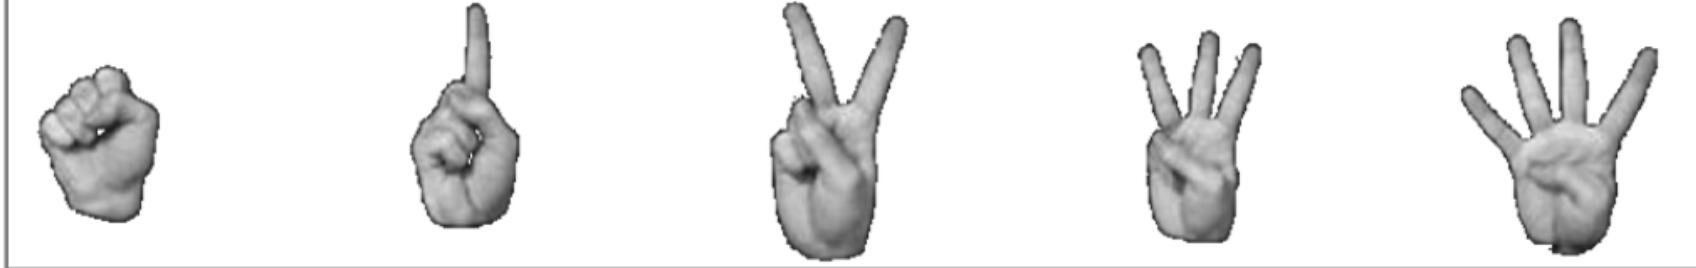

Muchas veces se utilizan técnicas de procesamiento de imágenes para obtener características representativas (features extraction) de los objetos dentro de una imagen con el objetivo de simplificar el problema, reducir la dimensionalidad y/o reducir el costo de procesamiento. Bibliotecas como OpenCV o
SciKit-Learn proveen funciones que permiten procesar imágenes y obtener valores estadísticos que caracterizan los objetos.
<ol type='a'>
<li>Utilice la función regionprops de SciKitLearn con algunas imágenes de ejemplo del dataset para experimentar con las distintas características que extrae de la imagen de la mano.</li>
<li>Implemente un script que convierta las imágenes en las carpetas “test” y “train” del dataset “Fingers” en dos archivos (uno por carpeta) separados por comas (csv). De todas las características que provee regionprops, tienen potencial aquellas que son independientes o se pueden independizar de las unidades (píxeles). Algunas de estas características pueden ser:
<ul>
  <li>filled_area: cantidad de píxeles que contiene región (podría interpretarse como píxeles cuadrados).</li>
  <li>major_axis_length: longitud (en píxeles) del eje mayor de la elipse que mejor se ajusta a la región.</li>
  <li>minor_axis_length: longitud (en píxeles) del eje menor de la elipse que mejor se ajusta a la región.</li>
  <li>perimeter: cantidad de píxeles que forman el contorne de la región.</li>
  <li>eccentricity: excentricidad de la elipse de mejor ajuste, cerca de 0 es un círculo, mientras que cerca de 1 es una elipse más “larga”.</li>
  <li>solidity: razón entre la cantidad de píxeles de la región original y de la región convexa. Para generar una región convexa se completan los pixeles de forma de eliminar regiones cóncavas de una figura. La región convexa de una estrella de 5 puntas se convertirá en un pentágono al completarla.</li>
  <li>extent: razón entre pixeles de la región original y el rectángulo que la contiene (bounding box).</li>
</ul>
</li>
<li>Entrene un modelo de multiperceptrón a partir del archivo de entrenamiento generado en el punto anterior.</li>
<li>Reflexione acerca de las propiedades geométricas generadas a partir de un objeto/región de una imagen. ¿Cómo cree que afectaría la rotación, translación y escalado de un objeto/región dentro de la imagen?</li>
</ol>

##Datos

In [ ]:
png = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/0a1a077a-5197-44d9-8607-248bf244930d_3R.png'

##Exploración

In [4]:
from skimage import io
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, find_contours
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

##Punto a)

Utilice la función regionprops de SciKitLearn.
Experimentar con las distintas características que extrae de la imagen de la mano.

array([[50, 49, 47, ..., 54, 54, 54],
       [50, 49, 48, ..., 54, 53, 52],
       [49, 49, 50, ..., 52, 51, 50],
       ...,
       [49, 50, 53, ..., 53, 50, 48],
       [49, 49, 50, ..., 53, 52, 52],
       [49, 49, 48, ..., 52, 53, 53]], dtype=uint8)
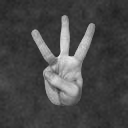

In [ ]:
imagen = io.imread(png)
imagen

In [ ]:
# aplicar un filtro pra aextraer el valor umbral
umbral =  threshold_otsu(imagen)
umbral

110

In [ ]:
# binarizar la imagen
imagen_bn = (imagen > umbral) *1
imagen_bn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# cerrar agujeros o cortes, si los tiene
imagen_bn = closing(imagen_bn, square(5))

In [ ]:
# remover irregularidades
imagen_lista = clear_border(imagen_bn)

# extraer regiones
regiones = regionprops(imagen_lista)

region= regiones[0]

for propiedad in region:
  if propiedad not in ['convex_image', 'coords', 'filled_image','image']:
    print('%20s:         '% propiedad, region[propiedad])

                area:          2523.0
           area_bbox:          5760.0
         area_convex:          3981.0
         area_filled:          2523.0
   axis_major_length:          87.43366937872752
   axis_minor_length:          53.45101825894992
                bbox:          (15, 31, 105, 95)
            centroid:          (64.4466904478795, 63.5077288941736)
      centroid_local:          [49.44669045 32.50772889]
        eccentricity:          0.7913740771632426
equivalent_diameter_area:          56.677891380738714
        euler_number:          1
              extent:          0.43802083333333336
  feret_diameter_max:          90.6697303403953
        image_convex:          [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
        image_filled:          [[False False 

###Gráfico de la imagen binarizada

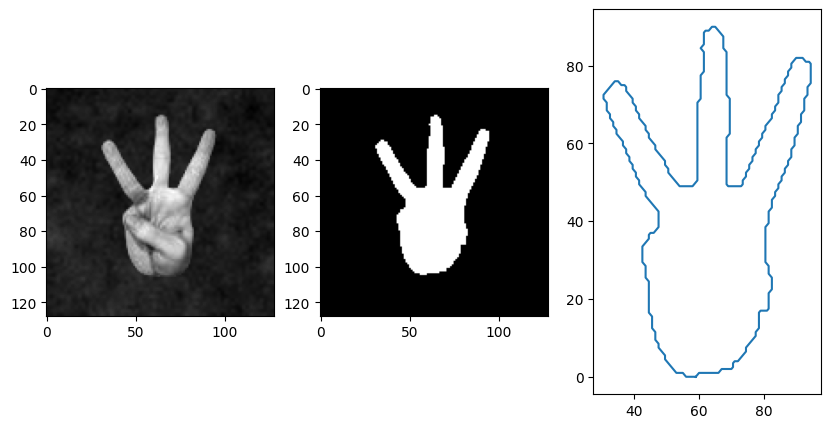

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,5))
axs[0].imshow(imagen, cmap='gray')
axs[1].imshow(imagen_bn, cmap='gray')

contorno = find_contours(imagen_bn, 0.5)[0]

y,x = contorno.T

axs[2].plot(x,y.max()-y)

##Punto b)

In [5]:
import glob

In [6]:
# Definir funciones

def extraer_caracteristicas(img):
  # Umbral
  umbral = threshold_otsu(img)
  # Binarizar
  imagen_bn = (img > umbral)*1
  # Cerrar ajugeros y eliminar irregularidades
  imagen_bn = closing(imagen_bn, square(5))
  # Limpiar los bordes
  imagen_lista = clear_border(imagen_bn)

  # extraer propiedades
  regiones= regionprops(imagen_lista)

  # Si todo salió, debería haber una única región
  region= regiones[0]

  return (region, imagen_lista)

def graficar(axs, imagen, cmap='gray'):
  axs.get_xaxis().set_ticks([])
  axs.get_yaxis().set_ticks([])

  axs.imshow(imagen, cmap=cmap)

def crear_dataset(ruta_origen, ruta_destino):
  # definir columnas
  columnas = ['areaNormalizada', 'perimetroNormalizado','razonEjes','excentricidad','solidez','extension','cantDedos']

  # busca en la dirección de origen todos los matches con .png y devuelve una lista
  archivos = glob.glob(ruta_origen+'*.png')
  data = np.empty((0, len(columnas)))

  for i, archivo in enumerate(archivos):
    # formato de nombre: *XL.png o *XR.png donde X es el numero de dedos
    img= io.imread(archivo)
    cantDedos = int(archivo[-6])

    propiedades, imagen_bn = extraer_caracteristicas(img)

    # completar las columnas con las características
    area = propiedades.filled_area
    ejeMayor = propiedades.major_axis_length
    ejeMenor = propiedades.minor_axis_length
    perimetro = propiedades.perimeter
    excentricidad = propiedades.eccentricity
    solidez = propiedades.solidity
    extension = propiedades.extent

    area = area/(ejeMayor*ejeMenor)
    perimetro = perimetro /((ejeMayor+ejeMenor)/2)
    razonEje = ejeMenor/ejeMayor

    data = np.append(data, np.array([[area, perimetro, razonEje, excentricidad, solidez, extension,
                                      cantDedos]]), axis=0)

  df = pd.DataFrame(columns=columnas, data=data)
  df.to_csv(ruta_destino)


###zip a csv

In [ ]:
# !unzip '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers.zip' -d '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers'

In [ ]:
dir_base = '/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers/fingers'

test = dir_base+'/test/'
train = dir_base+'/train/'

csv_train = dir_base+'/fingers_train.csv'
csv_test = dir_base+'/fingers_test.csv'

extraer = 0
if extraer:
  crear_dataset(test, csv_test)
  crear_dataset(train, csv_train)

In [7]:
df_train = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers/fingers/fingers_train.csv',index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/DeepLearning-colab/Datos-20240901/fingers/fingers/fingers_test.csv',index_col=0)

##Punto c

Entrene un modelo de multiperceptrón a partir del archivo de entrenamiento generado en el punto anterior.


In [8]:
target = 'cantDedos'

X_original = df_train.drop(columns=target)
y_original = df_train[target]

X = np.array(X_original)
y = np.array(y_original)

# binarizar etiquetas
y = binarizer.fit_transform(y)
y_binario = to_categorical(y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2)

# Normalizar datos
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [30]:
# Hiper
salidas = y.shape[1]
entradas = X_train.shape[1]
ocultas = 6
epocas = 100
tam_lote = int(X_train.shape[0]/100)
paciencia = 5
optimizador = 'adam'
activacion = 'relu'

# modelo
modelo = Sequential()

modelo.add(Dense(ocultas, activation=activacion,input_shape=[entradas]))
modelo.add(Dense(salidas, activation='softmax'))

modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# compilar
modelo.compile(optimizer=optimizador, loss='categorical_crossentropy',metrics=['accuracy'])

# Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=paciencia)

# Entrenar
hist = modelo.fit(X_train, y_train, epochs=epocas, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3053 - loss: 1.8645 - val_accuracy: 0.5128 - val_loss: 1.3428
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 1.2478 - val_accuracy: 0.5818 - val_loss: 1.0397
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6378 - loss: 0.9818 - val_accuracy: 0.6912 - val_loss: 0.8224
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7133 - loss: 0.7866 - val_accuracy: 0.7618 - val_loss: 0.6599
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 0.6268 - val_accuracy: 0.8689 - val_loss: 0.5116
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.4998 - val_accuracy: 0.8974 - val_loss: 0.4214
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9017 - loss: 0.4191 - val_accuracy: 0.9134 - val_loss: 0.3651
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.3581 - val_accu

In [32]:
# Predecir salida
y_pred = modelo.predict(X_train)
y_num = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_train, axis=1)
print(f'Accuracy: {accuracy_score(y_true, y_num)}')
print(f'Reporte \n{classification_report(y_true, y_num)}')

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.986746472851646
Reporte 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1178
           1       0.98      0.99      0.98      1172
           2       0.98      0.96      0.97      1167
           3       0.98      0.98      0.98      1197
           4       0.99      0.99      0.99      1155
           5       0.99      1.00      1.00      1148

    accuracy                           0.99      7017
   macro avg       0.99      0.99      0.99      7017
weighted avg       0.99      0.99      0.99      7017



In [13]:
print(f'Confusion matrix \n{confusion_matrix(y_true, y_num)}')

Confusion matrix 
[[1178    0    0    0    0    0]
 [   0 1157    4    0   11    0]
 [   0   28 1121   18    0    0]
 [   0    0   18 1179    0    0]
 [   0    0    0    7 1144    4]
 [   0    0    0    0    0 1148]]


### Datos de validación

In [33]:
# Predecir salida
y_pred = modelo.predict(X_val)
y_num = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_val, axis=1)
print(f'Accuracy: {accuracy_score(y_true, y_num)}')
print(f'Reporte \n{classification_report(y_true, y_num)}')
print(f'Confusion matrix \n{confusion_matrix(y_true, y_num)}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9846153846153847
Reporte 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       278
           1       0.95      0.99      0.97       277
           2       0.98      0.94      0.96       320
           3       0.98      0.99      0.98       277
           4       0.99      1.00      0.99       294
           5       1.00      1.00      1.00       309

    accuracy                           0.98      1755
   macro avg       0.98      0.99      0.98      1755
weighted avg       0.98      0.98      0.98      1755

Confusion matrix 
[[278   0   0   0   0   0]
 [  0 274   2   0   1   0]
 [  0  13 301   6   0   0]
 [  0   0   3 274   0   0]
 [  0   0   0   0 293   1]
 [  0   0   0   0   1 308]]


###Datos de testeo

In [15]:
df_test.shape

(3600, 7)

In [27]:
X_or = df_test.drop(columns=target)
y_or = df_test[target]

X_test = np.array(X_or)
y_test = np.array(y_or)

X_norm = scaler.transform(X_test)

In [34]:
y_pred_test = modelo.predict(X_norm)
y_num_test = np.argmax(y_pred_test, axis=1)

print(f'Accuracy: {accuracy_score(y_test, y_num_test)}')
print(f'Report: \n{classification_report(y_test, y_num_test, zero_division=0)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_num_test)}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9872222222222222
Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       600
         1.0       0.97      1.00      0.98       600
         2.0       0.97      0.96      0.96       600
         3.0       0.99      0.97      0.98       600
         4.0       1.00      0.99      1.00       600
         5.0       1.00      1.00      1.00       600

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600

Confusion Matrix: 
[[600   0   0   0   0   0]
 [  0 600   0   0   0   0]
 [  0  17 576   7   0   0]
 [  0   0  18 582   0   0]
 [  0   2   0   1 596   1]
 [  0   0   0   0   0 600]]


In [35]:
print(y_pred_test)
print(f'PRED: \n{y_num_test}')
print(f'TRUE: \n{y_test}')

[[8.4627005e-10 5.0957107e-05 5.5175647e-03 9.9393392e-01 4.1301700e-04
  8.4652238e-05]
 [6.5428577e-17 3.7960746e-09 8.4212863e-01 1.5787131e-01 6.7733742e-11
  5.0594511e-09]
 [2.9066345e-24 1.0449440e-06 9.9996859e-01 3.0286372e-05 7.7369687e-19
  2.6885200e-13]
 ...
 [9.9998063e-01 1.9321516e-05 1.2533629e-14 4.6352936e-21 1.0596876e-10
  6.0046404e-17]
 [9.9997681e-01 2.2809014e-05 7.2600888e-13 3.2230167e-16 3.3185208e-07
  3.7544205e-13]
 [2.2936170e-08 1.1332504e-12 8.2117906e-14 2.7670852e-11 1.3483752e-04
  9.9986529e-01]]
PRED: 
[3 2 2 ... 0 0 5]
TRUE: 
[3. 2. 2. ... 0. 0. 5.]
